In [113]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,Lasso,ElasticNet
import lightgbm as lg
import optuna
from category_encoders import *
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')
import pickle
#Get your class weights

from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier

SEED = 123



%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [114]:


train1 = pd.read_csv('Train.csv')

test1 = pd.read_csv('Test.csv')


samplesubmission = pd.read_csv('SampleSubmission.csv')


# Preview train dataset
test1.iloc[0].to_dict()

{'ID': 'ID_ZPMABNVX',
 'Year_of_Birth': 1954,
 'Education_Level': 'Graduation',
 'Marital_Status': 'Single',
 'Disposable_Income': 48556.8,
 'No_of_Kids_in_home': 0,
 'No_of_Teen_in_home': 1,
 'Date_Customer': '11-01-2013',
 'Recency': 85,
 'Discounted_Purchases': 6,
 'WebPurchases': 8,
 'CatalogPurchases': 2,
 'StorePurchases': 8,
 'Amount_on_Wines': 429,
 'Amount_on_Fruits': 20,
 'Amount_on_MeatProducts': 118,
 'Amount_on_FishProducts': 7,
 'Amount_on_SweetProducts': 23,
 'Amount_on_GoldProds': 41,
 'WebVisitsMonth': 8,
 'Cmp3Accepted': 0,
 'Cmp4Accepted': 0,
 'Cmp5Accepted': 0,
 'Cmp1Accepted': 0,
 'Cmp2Accepted': 0,
 'Any_Complain': 0}

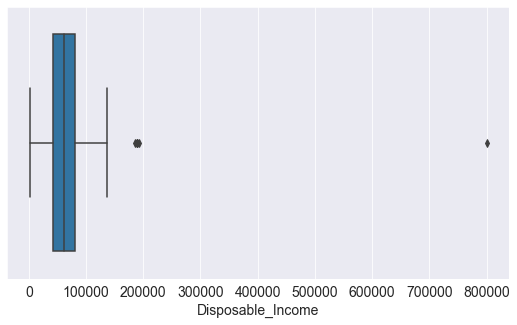

In [115]:
sns.boxplot(train1['Disposable_Income'])


train1.loc[train1['Disposable_Income'] > 200000]

train1 = train1.drop(190)

In [116]:
train1.drop('ID',1,inplace = True)

test1.drop('ID',1,inplace = True)





In [117]:
train1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_of_Birth,1567.0,NaN,NaN,NaN,1970.068283,11.922903,1900.0,1960.0,1971.0,1979.0,1997.0
Education_Level,1567,5,Graduation,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1567,8,Married,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disposable_Income,1551.0,NaN,NaN,NaN,61905.610832,26060.185092,2076.0,41580.0,60884.4,81418.2,192963.6
No_of_Kids_in_home,1567.0,NaN,NaN,NaN,0.460115,0.540361,0.0,0.0,0.0,1.0,2.0
No_of_Teen_in_home,1567.0,NaN,NaN,NaN,0.497766,0.54418,0.0,0.0,0.0,1.0,2.0
Date_Customer,1567,619,12-05-2014,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,1567.0,NaN,NaN,NaN,55.425016,28.790064,7.0,31.0,56.0,80.0,106.0
Discounted_Purchases,1567.0,NaN,NaN,NaN,2.29164,1.937682,0.0,1.0,2.0,3.0,15.0
WebPurchases,1567.0,NaN,NaN,NaN,4.001914,2.774519,0.0,2.0,3.0,6.0,27.0


## Exploratory Data Analysis

0    84.747926
1    15.252074
Name: Response, dtype: float64


<AxesSubplot:xlabel='Response', ylabel='count'>

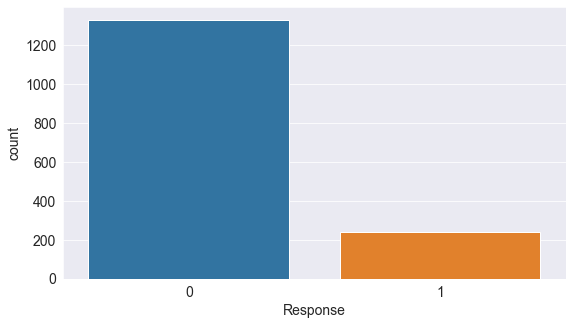

In [118]:
#percentage of different responses of customers
print(train1['Response'].value_counts(normalize=True)*100) 
sns.countplot(x='Response', data = train1)


Only 15 percent of their customers actually accepted the marketing campaign while the remaining 85 percent didnt

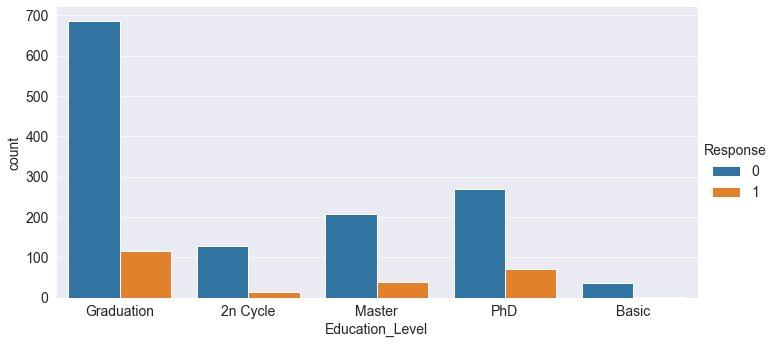

In [119]:
#Customers response based on education

sns.catplot(x='Education_Level',data=train1,hue='Response',kind='count',aspect=2)


Most customers who responded to the campaign have their hieghest education level as graduates

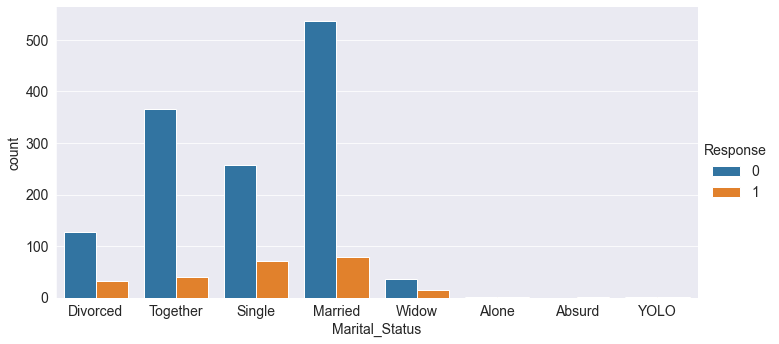

In [120]:
#Customers response based on marital status
sns.catplot(x='Marital_Status',data=train1,hue='Response',kind='count',aspect=2)



More customers who were married responded better to their marketing campaign

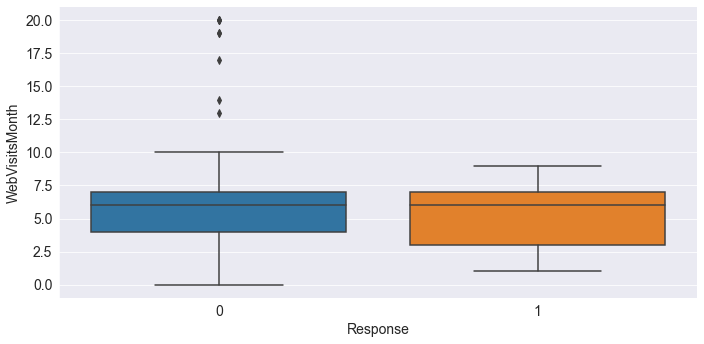

In [121]:
#Customers response based on web visit  

sns.catplot(y='WebVisitsMonth',x ='Response',data=train1,kind='box',aspect=2)

The customers who responded to the campaign and those who didnt respond visit the e-commerce website fairly at the same rate

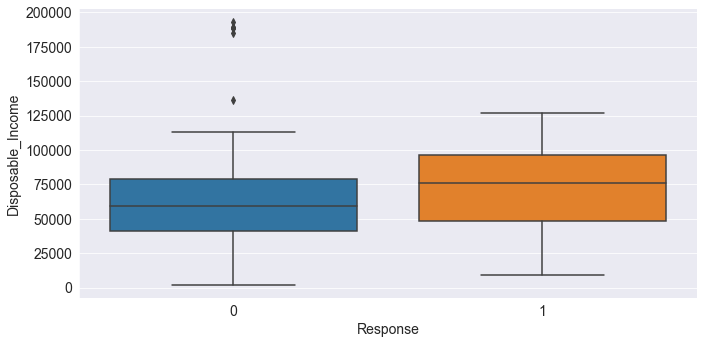

In [122]:
#Customers response based on Disposable_Income  

sns.catplot(y='Disposable_Income',x ='Response',data=train1,kind='box',aspect=2)

The customers who responded to the campaign had an higher disposable income on average than those who didnt respond


0    87.317073
1    12.682927
Name: Response, dtype: float64


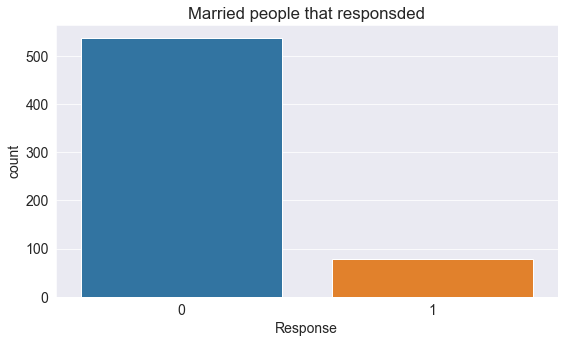

In [123]:
#proportion of married people that responded to the campaign
mar_res= train1[train1["Marital_Status"]== "Married"]["Response"]
print(mar_res.value_counts(normalize= True)* 100)
sns.countplot(mar_res)
plt.title("Married people that responsded")
plt.show()



0    78.419453
1    21.580547
Name: Response, dtype: float64


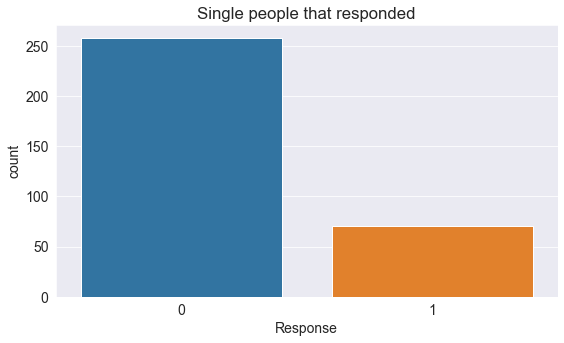

In [124]:

#proportion of Single people that responded to the campaign
mar_res= train1[train1["Marital_Status"]== "Single"]["Response"]
print(mar_res.value_counts(normalize= True)* 100)
sns.countplot(mar_res)
plt.title("Single people that responded")
plt.show()

0    79.874214
1    20.125786
Name: Response, dtype: float64


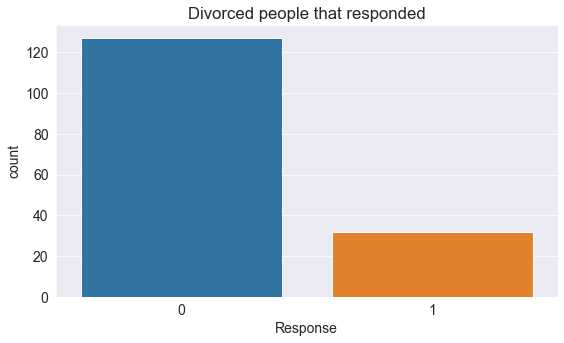

In [125]:
#proportion of Single people that responded to the campaign

mar_res= train1[train1["Marital_Status"]== "Divorced"]["Response"]
print(mar_res.value_counts(normalize= True)* 100)
sns.countplot(mar_res)
plt.title("Divorced people that responded")
plt.show()

0    72.0
1    28.0
Name: Response, dtype: float64


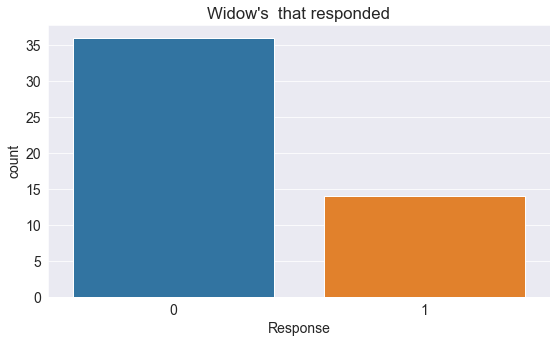

In [126]:
#proportion of Widows that responded to the campaign

mar_res= train1[train1["Marital_Status"]== "Widow"]["Response"]
print(mar_res.value_counts(normalize= True)* 100)
sns.countplot(mar_res)
plt.title("Widow's  that responded")
plt.show()

0    89.95098
1    10.04902
Name: Response, dtype: float64


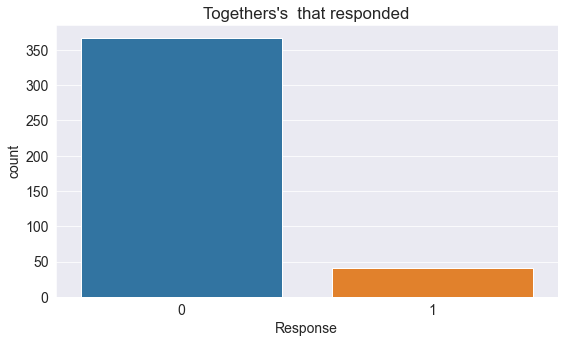

In [127]:
#proportion of Together that responded to the campaign

mar_res= train1[train1["Marital_Status"]== "Together"]["Response"]
print(mar_res.value_counts(normalize= True)* 100)
sns.countplot(mar_res)
plt.title("Togethers's  that responded")
plt.show()

0    85.642946
1    14.357054
Name: Response, dtype: float64


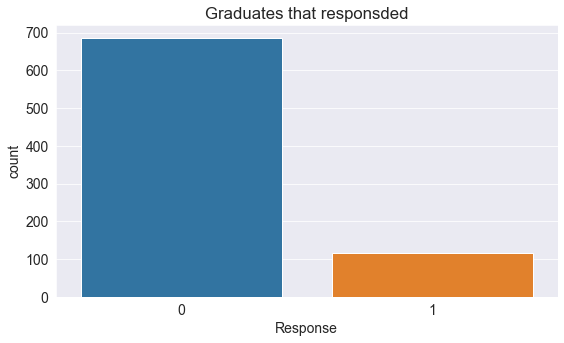

In [128]:
#proportion of graduates that responded to the campaign
edu_res= train1[train1["Education_Level"]== "Graduation"]["Response"]
print(edu_res.value_counts(normalize= True)* 100)
sns.countplot(edu_res)
plt.title("Graduates that responsded")
plt.show()

0    84.552846
1    15.447154
Name: Response, dtype: float64


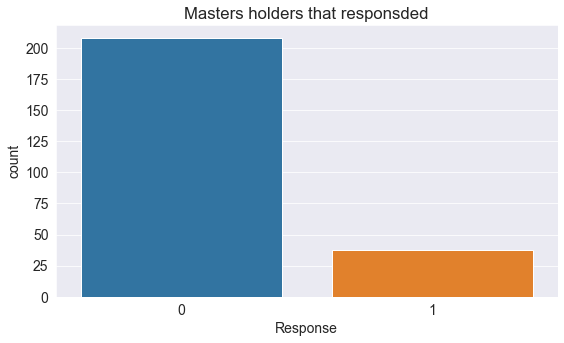

In [129]:
#proportion of masters holders that responded to the campaign
edu_res= train1[train1["Education_Level"]== "Master"]["Response"]
print(edu_res.value_counts(normalize= True)* 100)
sns.countplot(edu_res)
plt.title("Masters holders that responsded")
plt.show()

0    79.117647
1    20.882353
Name: Response, dtype: float64


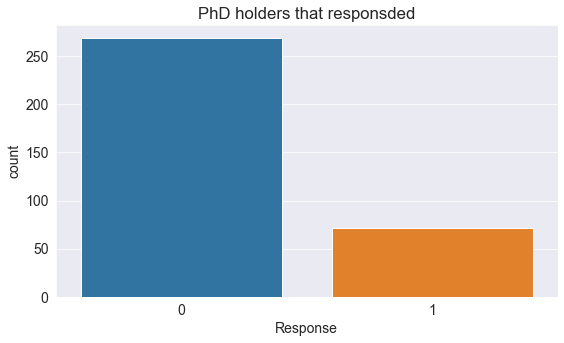

In [130]:
#proportion of phD holders that responded to the campaign
edu_res= train1[train1["Education_Level"]== "PhD"]["Response"]
print(edu_res.value_counts(normalize= True)* 100)
sns.countplot(edu_res)
plt.title("PhD holders that responsded")
plt.show()

0    90.140845
1     9.859155
Name: Response, dtype: float64


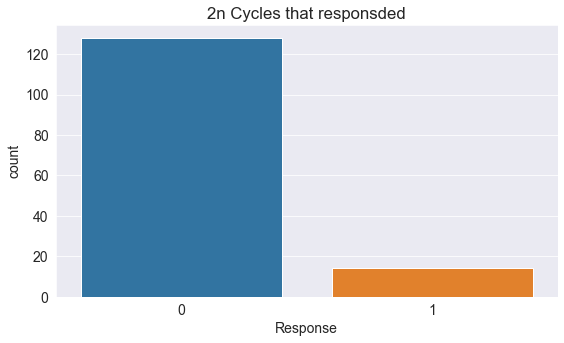

In [131]:
#proportion of 2n Cycles that responded to the campaign
edu_res= train1[train1["Education_Level"]== "2n Cycle"]["Response"]
print(edu_res.value_counts(normalize= True)* 100)
sns.countplot(edu_res)
plt.title("2n Cycles that responsded")
plt.show()

#  Data Prepocessing and Feature Engineering

In [132]:
test1['Response'] = 2

data = pd.concat([train1,test1]).reset_index(drop=True)

In [133]:



data['Disposable_Income'].fillna(-9999, inplace=True)


min(data['Date_Customer'])

'01-01-2013'

In [134]:
data['Date_Customer'] = pd.to_datetime(data['Date_Customer'])
# test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])


Today =  pd.to_datetime('2015-1-1')



# Extract date features
def extract_date_info(df,cols):
    for feat in cols:
        df[feat +'_year'] = df[feat].dt.year        
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter  
        df[feat +'_weekday'] = df[feat].dt.weekday
        
        
        
        
    # df.drop(columns=['Date_Customer'],axis=1,inplace=True)


extract_date_info(data,['Date_Customer'])

data['Duration_Customer']  = (Today - data['Date_Customer']).dt.days

data['months_Dur_Customer'] = (Today- data['Date_Customer']) / pd.Timedelta(days=31)
data['months_Dur_Customer'] = data['months_Dur_Customer'].astype(int)

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
data['day_of_week_name']=data['Date_Customer'].dt.weekday.map(dw_mapping)


data['is_month_end'] = data.Date_Customer.dt.is_month_end.astype(int)
data['is_month_start'] = data.Date_Customer.dt.is_month_start.astype(int)

data.head()

data.drop(columns=['Date_Customer'],axis=1,inplace=True)

In [135]:
#combine the year month feature  

data['year_month'] = data['Date_Customer_year'].apply(str) + '_' + data['Date_Customer_month'].apply(str)

# data['year_month_mean'] = data

data['Recency' + 'year_month_mean'] =data.groupby('year_month')['Recency'].transform('mean')
data['Recency' + 'year_month_std'] =data.groupby('year_month')['Recency'].transform('std')
data['Recency' + 'year_month_min'] =data.groupby('year_month')['Recency'].transform('min')
data['Recency' + 'year_month_max'] =data.groupby('year_month')['Recency'].transform('max')

data

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,...,Duration_Customer,months_Dur_Customer,day_of_week_name,is_month_end,is_month_start,year_month,Recencyyear_month_mean,Recencyyear_month_std,Recencyyear_month_min,Recencyyear_month_max
0,1955,Graduation,Divorced,77504.4,1,1,56,2,1,1,...,193,6,Sunday,0,0,2014_6,53.590164,30.163652,7,106
1,1958,Graduation,Together,56784.0,0,1,17,6,5,1,...,723,23,Tuesday,0,0,2013_1,56.645833,27.109128,7,106
2,1962,Graduation,Single,103714.8,0,0,17,0,7,4,...,406,13,Thursday,0,0,2013_11,55.160000,28.999728,7,104
3,1979,2n Cycle,Single,46311.6,1,0,49,3,4,1,...,475,15,Friday,0,0,2013_9,52.218391,31.242646,7,106
4,1959,Graduation,Married,87486.0,0,0,59,1,3,7,...,345,11,Tuesday,0,0,2014_1,53.822785,30.751177,7,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1975,Graduation,Married,80934.0,0,1,70,5,9,6,...,754,24,Saturday,0,0,2012_12,52.000000,27.772888,8,104
2235,1955,Graduation,Divorced,84052.8,0,1,53,4,7,10,...,682,22,Monday,0,0,2013_2,53.035714,28.370753,8,104
2236,1952,PhD,Married,63974.4,0,0,39,1,5,1,...,480,15,Sunday,0,0,2013_9,52.218391,31.242646,7,106
2237,1960,Graduation,Together,69548.4,0,1,31,7,4,6,...,500,16,Monday,0,0,2013_8,57.153846,26.609645,9,104


In [136]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases']
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds']

In [137]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])


df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

new_data = pd.concat([data, df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

data = new_data

In [138]:

data['Rec_count'] = pd.qcut(data.Recency, q = [0, .2, .4, .6, .8, 1], labels=False)
data['Web_count'] = pd.qcut(data.WebVisitsMonth, q = [0, .2, .4, .6, .8, 1], labels=False)

# data['Age'] = Today.year - data['Year_of_Birth'] 

data['WebVisitsMonth'].max()

20

In [139]:
data['total_kids'] = data['No_of_Kids_in_home'] + data['No_of_Teen_in_home']


data['total_purchase'] = data['WebPurchases'] + data['CatalogPurchases'] + data['StorePurchases']

data['tot_food_price'] = data['Amount_on_Fruits'] + data['Amount_on_MeatProducts']+ data['Amount_on_Wines'] + data['Amount_on_FishProducts'] + data['Amount_on_SweetProducts'] + data['Amount_on_GoldProds']

#data['Amount_on_Wines']+ 

data['wine_frac'] = data['Amount_on_Wines'] / data['tot_food_price']

data['fish_net'] = data['tot_food_price']  - data['Amount_on_FishProducts'] 


data['gold_dis'] = data['Amount_on_GoldProds'] / data['Disposable_Income']  


data['meat_dis'] = data['Amount_on_MeatProducts'] / data['Disposable_Income']  

data['wine_dis'] = data['Amount_on_Wines'] / data['Disposable_Income']  


data['food_dis'] = data['Disposable_Income']  - data['tot_food_price'] 


# Model building

In [140]:
#list of selected features

feat= ['Recency', 'year_month', 'Rec_count', 'Cmp3Accepted', 'Cmp5Accepted',
       'Cmp1Accepted', 'WebVisitsMonth', 'Marital_Status', 'wine_frac',
       'Duration_Customer', 'gold_dis', 'No_of_Teen_in_home', 'Web_count',
       'poly2_7', 'poly2_2', 'StorePurchases', 'Disposable_Income', 'poly1_3',
       'months_Dur_Customer', 'poly2_5', 'poly1_7', 'Education_Level',
       'poly2_11', 'total_kids', 'food_dis', 'poly1_9',
       'Amount_on_MeatProducts', 'Cmp4Accepted', 'poly2_17', 'fish_net',
       'poly2_3', 'meat_dis', 'poly1_2', 'poly2_10', 'CatalogPurchases',
       'Amount_on_FishProducts', 'WebPurchases', 'day_of_week_name', 'poly1_8',
       'Amount_on_GoldProds','Response']




data = data[feat]



In [141]:

#split the data into features and target
test =data[data['Response'] == 2]
test.drop(['Response'],1,inplace =True)



print(test.shape)

train =data[data['Response'] != 2]
#train_b= train_b.astype('float64')

# train_b = drop_outliers(train_b,3)


test.isnull().sum()

print(train.shape)

(672, 40)
(1567, 41)


In [142]:

t_target = train['Response']

t_data = train.drop(['Response'],1).reset_index(drop=True)

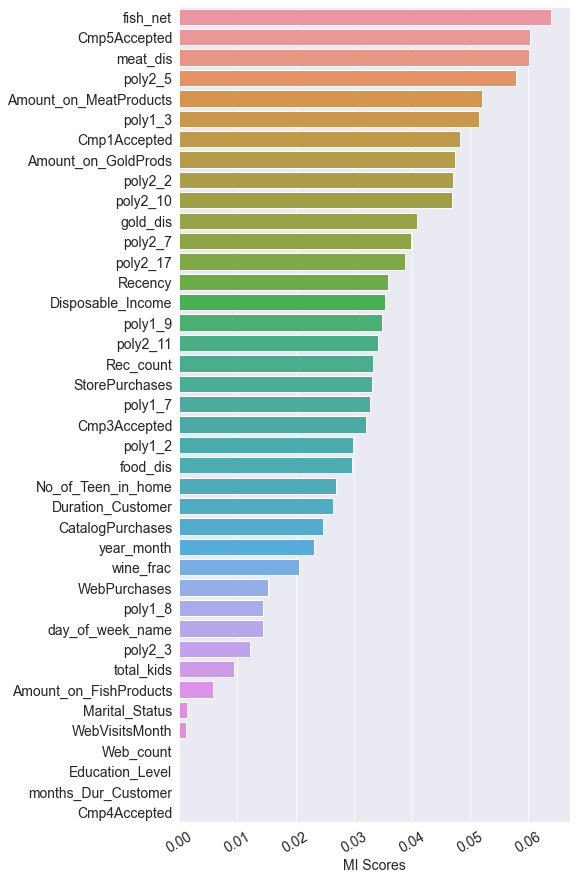

In [143]:
#Mutual information for feature selection

rf = t_data.copy()


# Label encoding for categoricals
for colname in rf.select_dtypes(["object","category"]):
    rf[colname], _ = rf[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = rf.dtypes == int



from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# fr = rf.drop('location',1)

mi_scores = make_mi_scores(rf, t_target, discrete_features)
# mi_scores[::3]
# mi_scores[::3][mi_scores[::3] > 0.001]


#Plot mutual information
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    
    
    plt.figure(figsize=(7,15))
    plt.xticks(rotation= 30)
    

    sns.barplot(x=scores , y= scores.index) 
    plt.show()
    
   

    #pram ={'criterion': 'entropy', 'max_depth': 2, 'max_features': 22, 'max_leaf_nodes': 123, 'min_samples_leaf': 14,
       #'min_samples_split': 42, 'min_weight_fraction_leaf': 0.010574958266160707,'random_state':SEED}

# plt.figure(dpi=100, figsize=(8, 5))

plot_mi_scores(mi_scores)




In [144]:
train_x, test_x, train_y, test_y = train_test_split(t_data, t_target, stratify= t_target,test_size=0.2,
                                                    random_state=SEED)

param = {'learning_rate': 0.143373511155058,'reg_lambda': 3.579661579314026, 'reg_alpha': 4.805773216010388e-08, 'subsample': 0.48731004944996775,
 'colsample_bytree': 0.7142487807145416,'max_depth': 5,'scale_pos_weight': 5}

ordi = OrdinalEncoder(cols=train_x[['Education_Level','Marital_Status']]) 
trg = TargetEncoder(cols=train_x[['year_month','day_of_week_name']])

Light = lg.LGBMClassifier(**param ,n_estimators=100,random_state=SEED)
Logistic = LogisticRegression(class_weight='balanced',random_state=SEED)

In [145]:

#pipeline for lightgbm
step = [ ('encoder', ordi),('enc', trg),('lgbm',Light)] 
pipeline = Pipeline(step)
pipeline = pipeline.fit(train_x,train_y)
preds = pipeline.predict(test_x)

#pipeline for logistic regression
step = [ ('encoder', ordi),('enc', trg),('lgbm', Logistic)] 
pipeline = Pipeline(step)
pipeline = pipeline.fit(train_x,train_y)
pred_Logistic = pipeline.predict(test_x)

Light_accuracy  = accuracy_score(test_y,preds)
Logistic_accuracy  = accuracy_score(test_y,pred_Logistic)


print('Light accuracy : ',Light_accuracy, '\t')
print('Logistic accuracy :',Logistic_accuracy) 


Light accuracy :  0.8694267515923567 	
Logistic accuracy : 0.7420382165605095


[[242  24]
 [ 17  31]]


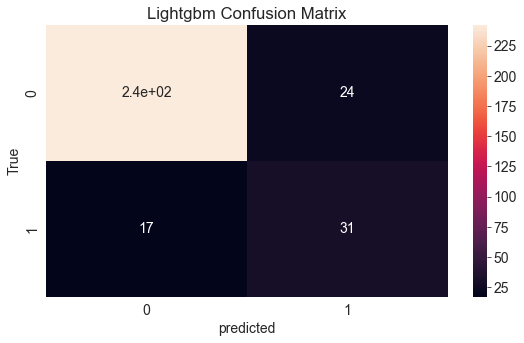

<Figure size 720x432 with 0 Axes>

In [153]:
#Lightgbm confusion matrix

ax= plt.subplot()
cm= confusion_matrix(test_y,preds)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);
plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True");
ax.set_title("Lightgbm Confusion Matrix");

[[195  71]
 [ 10  38]]


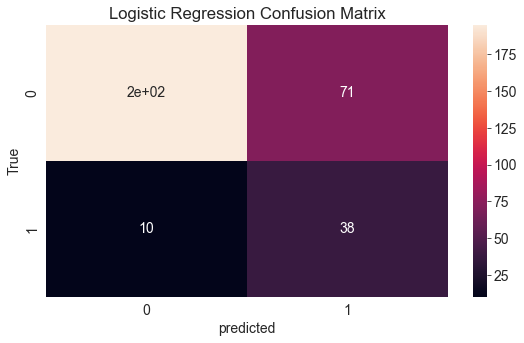

<Figure size 720x432 with 0 Axes>

In [154]:
#Logistic regression confusion matrix

ax= plt.subplot()
cm= confusion_matrix(test_y,pred_Logistic)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);
plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True");
ax.set_title("Logistic Regression Confusion Matrix");

<AxesSubplot:ylabel='Density'>

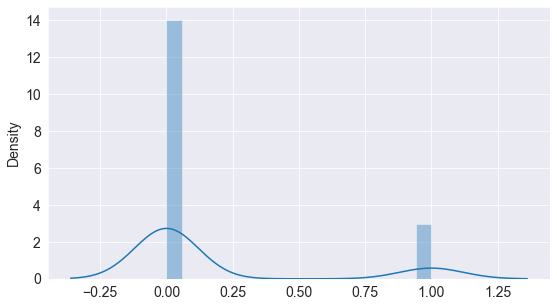

In [149]:
#distibution of predicted values
sns.distplot(preds)





# print(confusion_matrix(test_y,pred))
# print(classification_report(test_y,pred))

# # print(pipeline.get_params())

# print(pred)


Text(0.5, 1.0, 'Model features importance:')

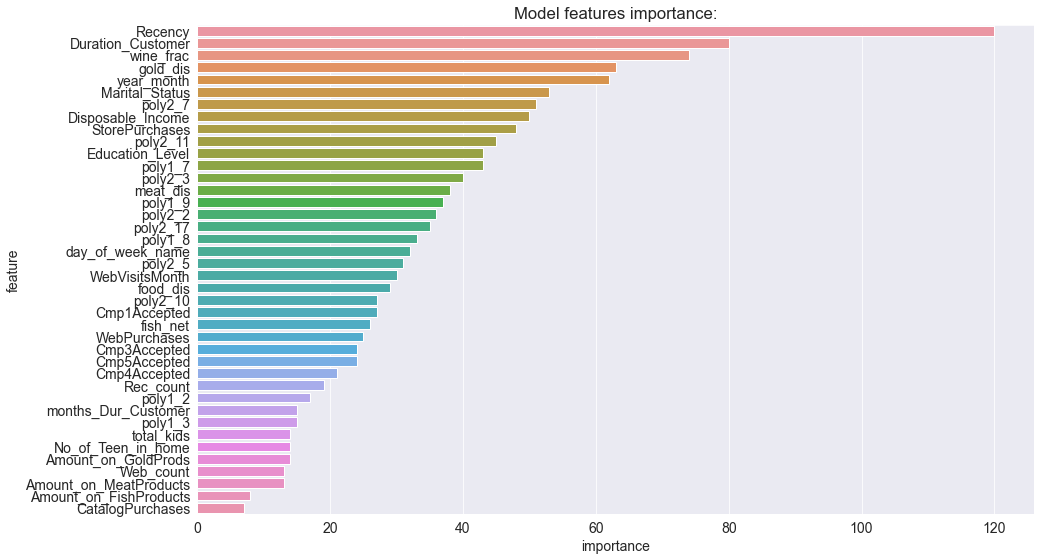

In [158]:


feature_importance_df = pd.DataFrame(Light.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = train_x.columns

plt.figure(figsize=(15, 9));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Model features importance:')

In [148]:
filename = 'campaign_model.sav'
with open(filename,'wb') as ft:
    pickle.dump(pipeline, ft)